# **Develop A Neural Network That Can Read Handwriting**

*DataSet_Link*: https://en.wikipedia.org/wiki/MNIST_database 


Author :Saurabh_Kumar

Date   :20_Sept_21

Task3  :01

In [1]:
#import lib..
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import matplotlib_inline

In [2]:
#importing warnings for get rid to long error 
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing keras from tensorflow (working in backend)
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras import Model
from keras.layers import Dense
from keras import layers


In [4]:
#directly using the mnist data from keras
(X_train ,y_train),(X_test,y_test) =keras.datasets.mnist.load_data()

In [5]:
#len
print("Length of Training data: ",len(X_train))
print("Length of Test data    : ",len(X_test))

Length of Training data:  60000
Length of Test data    :  10000


In [6]:
#Scaling the data
X_train  =X_train/255
X_test   =X_test/255

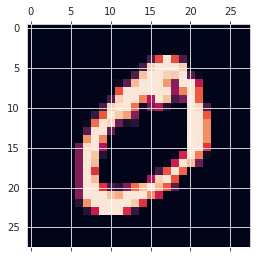

In [7]:
#data visulization
plt.matshow(X_train[1])

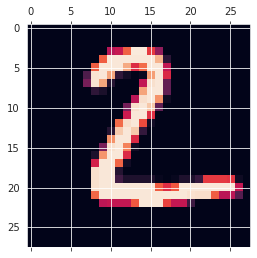

In [8]:
plt.matshow(X_test[1])

In [9]:
#type of target values in training set
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
#type of target values in y_test
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
#count of target values per output to check wheather data is balanced of not in traning set
unique_element ,count_element =np.unique(y_train,return_counts=True)
print(np.asarray((unique_element,count_element)))

[[   0    1    2    3    4    5    6    7    8    9]
 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]]


In [12]:
#count of target values per output to check the test data is balanced or not
unique_element ,count_element =np.unique(y_test,return_counts=True)
print(np.asarray((unique_element,count_element)))

[[   0    1    2    3    4    5    6    7    8    9]
 [ 980 1135 1032 1010  982  892  958 1028  974 1009]]


In [13]:
#flattining the data
X_train_flatten =X_train.reshape(len(X_train),28*28)
X_test_flatten =X_test.reshape(len(X_test),28*28)

In [14]:
#shape of data
print("Shape :")
print("Train of X_train_flatten:",X_train_flatten.shape)
print("Test of X_test_flatten:",X_test_flatten.shape)

Shape :
Train of X_train_flatten: (60000, 784)
Test of X_test_flatten: (10000, 784)


In [15]:
#X_train_flatten
X_train_flatten[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
#model
model =Sequential()
#1st hidden layers
model.add(Dense(units=30, activation='relu', use_bias=True, kernel_initializer='he_uniform',input_shape=(784,)))
#2nd hidden layers 
model.add(Dense(units=45,activation='relu',kernel_initializer='he_uniform'))
#3rd hidden layers 
model.add(Dense(units=20,activation='relu',kernel_initializer='he_uniform'))
#output_layers
model.add(Dense(units=10,activation='sigmoid',kernel_initializer='glorot_uniform'))

In [17]:
#model_summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 45)                1395      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                920       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 26,075
Trainable params: 26,075
Non-trainable params: 0
_________________________________________________________________


In [18]:
#compile_model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flatten,y_train,batch_size=32,epochs=50,validation_split=0.3)

Epoch 1/50
1313/1313 [==============================] - 4s 2ms/step - loss: 0.4020 - accuracy: 0.8801 - val_loss: 0.2441 - val_accuracy: 0.9274
Epoch 2/50
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1893 - accuracy: 0.9437 - val_loss: 0.1816 - val_accuracy: 0.9467
Epoch 3/50
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1434 - accuracy: 0.9575 - val_loss: 0.1555 - val_accuracy: 0.9544
Epoch 4/50
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1199 - accuracy: 0.9637 - val_loss: 0.1525 - val_accuracy: 0.9554
Epoch 5/50
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1046 - accuracy: 0.9681 - val_loss: 0.1519 - val_accuracy: 0.9557
Epoch 6/50
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0926 - accuracy: 0.9710 - val_loss: 0.1660 - val_accuracy: 0.9537
Epoch 7/50
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0839 - accuracy: 0.9736 - val_loss: 0.1416 - val_accuracy:

In [19]:
#save this model so that we can do testing by using tgis model..
#save it as h5 file
from tensorflow.keras.models import load_model
model.save('model_digit_classification.h5')

In [20]:
#evaluate model
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2673 - accuracy: 0.9656


[0.26727086305618286, 0.9656000137329102]

In [21]:
#predicted_data
y_predict = model.predict(X_test_flatten)

In [22]:
#chcek the predicted data
y_predict[0]

array([1.4709170e-06, 4.0834315e-13, 9.3146980e-01, 9.8229891e-01,
       7.9199672e-04, 6.1173771e-13, 6.2292819e-24, 1.0000000e+00,
       2.6785883e-05, 3.9541900e-02], dtype=float32)

Correct Classified:


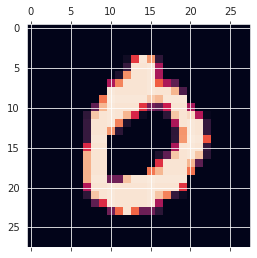

In [23]:
plt.matshow(X_test[3])

In [24]:
np.argmax(y_predict[3])

0

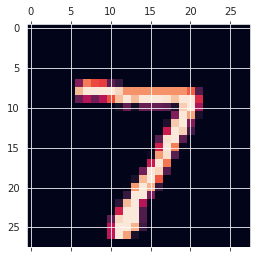

In [25]:
plt.matshow(X_test[0])

In [26]:
np.argmax(y_predict[0])

7

In [27]:
#checking the unique values .
np.unique(y_test,axis=0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [28]:
##coverting the y_pred values lables as y_test
y_pred_label =[np.argmax(i) for i in y_predict]
np.unique(y_pred_label,axis=0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
#confusion matrix
cm =tf.math.confusion_matrix(y_test,y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    1,    0,    1,    2,    0,    0,    1,    1,    0],
       [   0, 1121,    3,    3,    0,    0,    2,    1,    5,    0],
       [  13,   12,  995,    1,    1,    0,    1,    4,    4,    1],
       [   0,   14,   65,  923,    0,    2,    0,    5,    1,    0],
       [   1,   10,   10,    0,  944,    0,    5,    1,    3,    8],
       [   7,    1,    2,  104,    3,  755,    5,    3,   10,    2],
       [  84,    3,   13,    2,   60,   13,  780,    0,    3,    0],
       [   6,    7,   48,    5,    8,    0,    0,  943,    2,    9],
       [  27,    1,   33,   95,   13,   10,   15,    2,  775,    3],
       [   3,    2,    0,   13,   41,    4,    1,    4,   19,  922]],
      dtype=int32)>

[]

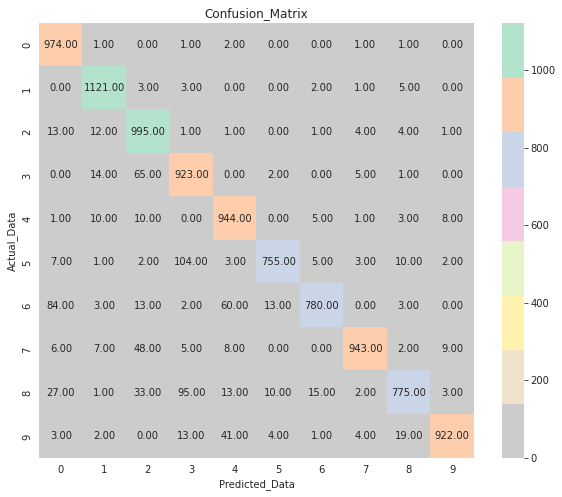

In [30]:
##heatplot confusion_matrix
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
plt.title("Confusion_Matrix")
sns.heatmap(cm,cbar=True,square=True,annot=True,annot_kws={'size':10},cmap='Pastel2_r',fmt='.2f')
plt.xlabel("Predicted_Data")
plt.ylabel("Actual_Data")
plt.plot()